<a href="https://colab.research.google.com/github/TokaAyman/Unsupervised-ML-Project/blob/main/Customer%20Segmentation%20-%20Credit%20Cards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation**
---

In [49]:
# Enable uploading interactive Plotly charts to your online Plotly account
!pip install chart-studio

In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd

#check for outliers
from scipy import stats

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chart_studio.plotly as py
import chart_studio

# Set Plotly credentials
chart_studio.tools.set_credentials_file(
    username='Tokaa',
    api_key='********************'
)


# Preprocessing
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from scipy.stats import boxcox


# Dimensionality Reduction
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap

# Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation
from sklearn.metrics import silhouette_score


# Classification (optional, used later?)
from sklearn.tree import DecisionTreeClassifier

# 3D Plotting Support
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plots with Matplotlib


# 1.  📂 Data Loading
---

In [123]:
df = pd.read_csv('CC GENERAL.csv')


# 2. Data Inspection
 ---



In [52]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### ⚠️*Key take away*

CREDIT_LIMIT  only has 1 missing value and MINIMUM_PAYMENTS has about 3.5% missing values which is relatively small but still can't drop it so we can fill with the median

In [54]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [55]:
df.shape

(8950, 18)

In [56]:
df.dtypes

,0
CUST_ID,object
BALANCE,float64
BALANCE_FREQUENCY,float64
PURCHASES,float64
ONEOFF_PURCHASES,float64
INSTALLMENTS_PURCHASES,float64
CASH_ADVANCE,float64
PURCHASES_FREQUENCY,float64
ONEOFF_PURCHASES_FREQUENCY,float64
PURCHASES_INSTALLMENTS_FREQUENCY,float64


In [57]:
df['CUST_ID'].nunique()

8950

In [58]:
df.isna().sum()

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [59]:
df.nunique()

,0
CUST_ID,8950
BALANCE,8871
BALANCE_FREQUENCY,43
PURCHASES,6203
ONEOFF_PURCHASES,4014
INSTALLMENTS_PURCHASES,4452
CASH_ADVANCE,4323
PURCHASES_FREQUENCY,47
ONEOFF_PURCHASES_FREQUENCY,47
PURCHASES_INSTALLMENTS_FREQUENCY,47


In [60]:
df["TENURE"].value_counts()

,count
TENURE,
12,7584
11,365
10,236
6,204
8,196
7,190
9,175


In [61]:
# Most frequent numbers and thier count
for col in df.columns:
  print(f'{col}: {df[col].value_counts().index[0]} ({df[col].value_counts().iloc[0]})')

CUST_ID: C19190 (1)
BALANCE: 0.0 (80)
BALANCE_FREQUENCY: 1.0 (6211)
PURCHASES: 0.0 (2044)
ONEOFF_PURCHASES: 0.0 (4302)
INSTALLMENTS_PURCHASES: 0.0 (3916)
CASH_ADVANCE: 0.0 (4628)
PURCHASES_FREQUENCY: 1.0 (2178)
ONEOFF_PURCHASES_FREQUENCY: 0.0 (4302)
PURCHASES_INSTALLMENTS_FREQUENCY: 0.0 (3915)
CASH_ADVANCE_FREQUENCY: 0.0 (4628)
CASH_ADVANCE_TRX: 0 (4628)
PURCHASES_TRX: 0 (2044)
CREDIT_LIMIT: 3000.0 (784)
PAYMENTS: 0.0 (240)
MINIMUM_PAYMENTS: 299.351881 (2)
PRC_FULL_PAYMENT: 0.0 (5903)
TENURE: 12 (7584)


### ⚠️*Key take away*

#### Half Avoid Cash Advances
*   4,628 customers (≈52%) never use cash advances at all.
*   Implication: Cash advance features appeal to a minority—focus marketing and risk efforts elsewhere.


#### Highly Engaged Monthly Users


*   6,211 customers (≈69%) have a balance update every cycle (frequency = 1.0).

*   Implication: These regular users are prime targets for credit-limit increases, rewards, or smart payment alerts.



One-Off Purchases Are Rare


*   4,302 customers (≈48%) never make a one-off purchase.
*   A small group clusters around ~$45–$50 transactions (groceries, fuel).
*   Implication: Most prefer installments or cash; one-off purchasers are a niche segment worth special offers.






Installment Purchases Are Limited


*   The majority never use installments; only a few do moderate or very large installment buys.
*   Implication: Installment-based promotions could convert occasional users but should target a small, specific audience.




Diverse Engagement Levels


*   Customers split between “always active” (purchase frequency = 1 for ~24%) and “never active” in various features.
*   Implication: Segment engagement and tailor communications—e.g., re-engagement campaigns for low-activity users.



Sparse Full-Bill Payers


*   Only ~16% ever pay in full (PRC_FULL_PAYMENT > 0).
*   Implication: Most carry a balance (and generate interest revenue), but the full-payers are lower-risk and ideal for premium offers.



# 3. 🧹 Data Cleaning

In [124]:
# Fill NaN values in 'MINIMUM_PAYMENTS' and 'CREDIT_LIMIT' with their respective medians
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())


In [125]:
# drop unneeded columns
df.drop('CUST_ID', axis=1, inplace=True)

In [64]:
#check for outliers
z_scores = df.apply(lambda x: np.abs(stats.zscore(x, nan_policy='omit')))
for col in df:
    z = z_scores[col] > 3
    print(z.sum())

196
176
135
122
137
182
0
0
0
199
172
185
152
159
102
0
394


### ⚠️*Key take away*

Most spending and balance variables (e.g., BALANCE, CASH_ADVANCE, PURCHASES_TRX) show 120–200+ outliers, indicating a few customers with extreme activity, while all frequency metrics and PRC_FULL_PAYMENT have zero outliers, reflecting tightly clustered rates. TENURE stands out with ~400 outliers, from unusually short account lifespans.

In [126]:
# Preserve a copy of the original DataFrame to attach cluster labels and use for reporting
df_with_clusters = df.copy()


# 4. 📊 Exploratory Data Visualization
---

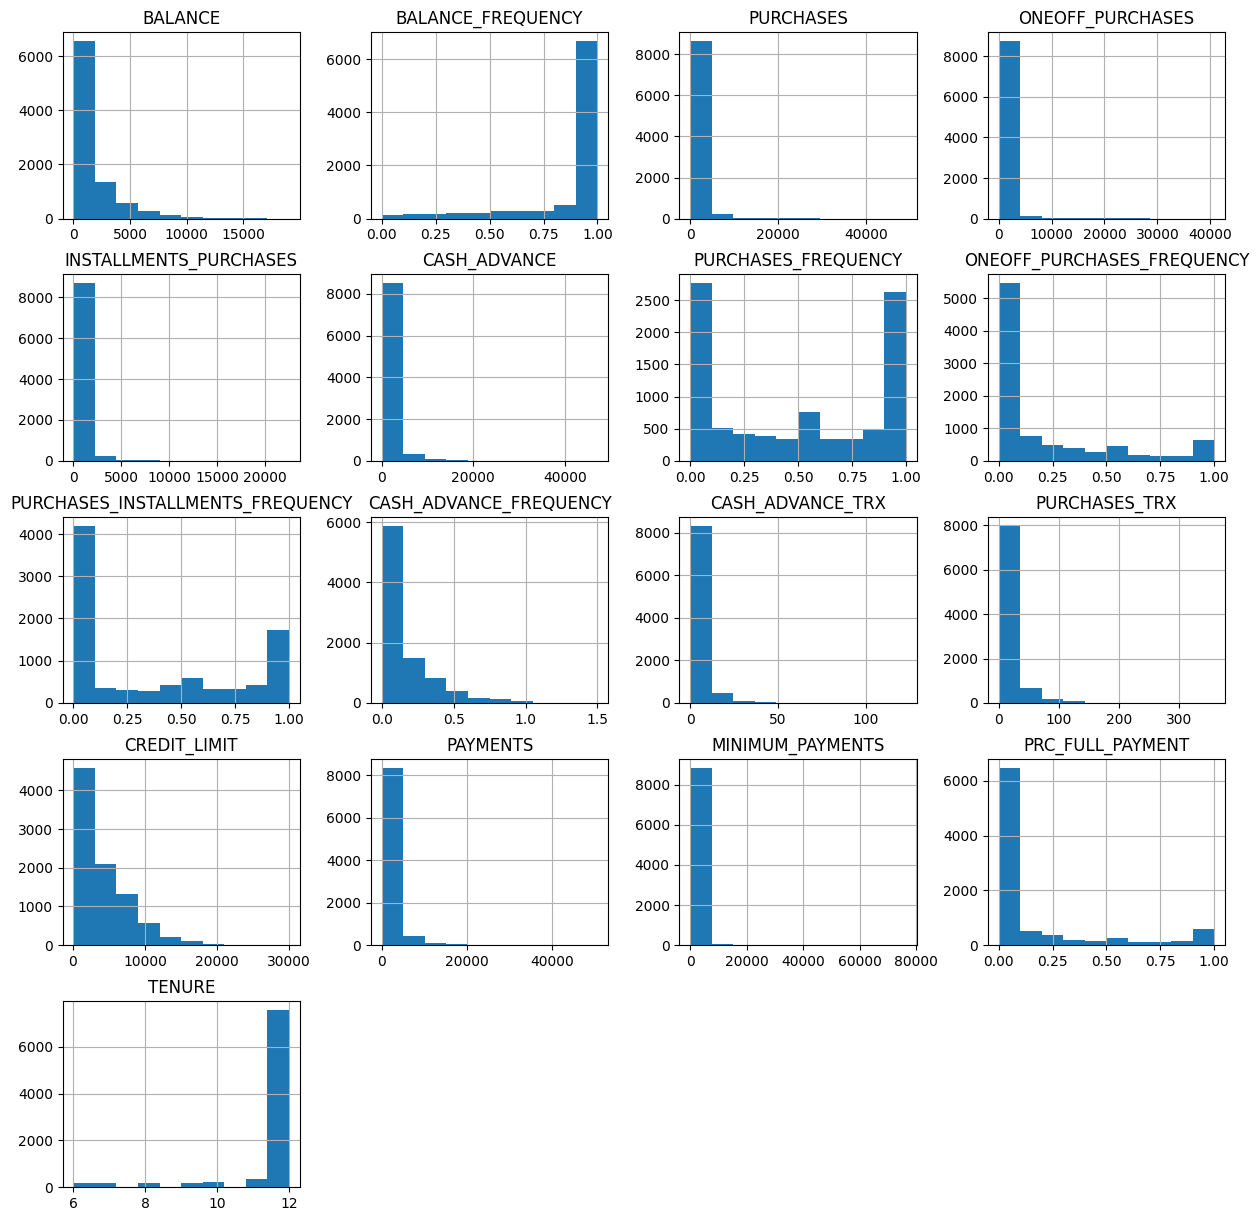

In [66]:
df.hist(figsize=(15,15))
plt.show()

<Figure size 1500x1500 with 0 Axes>

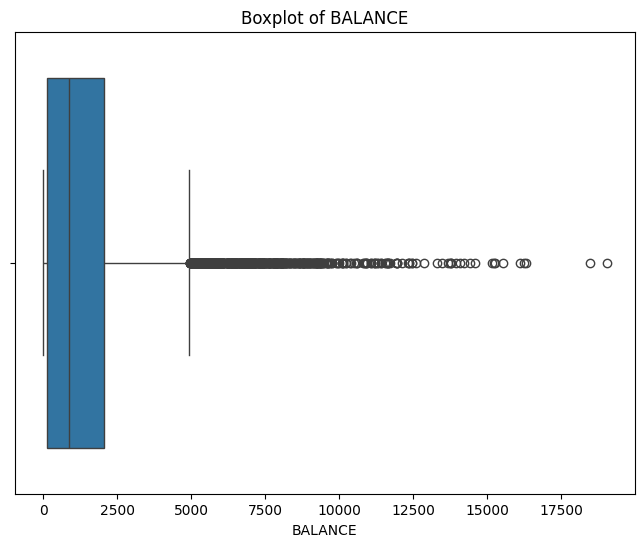

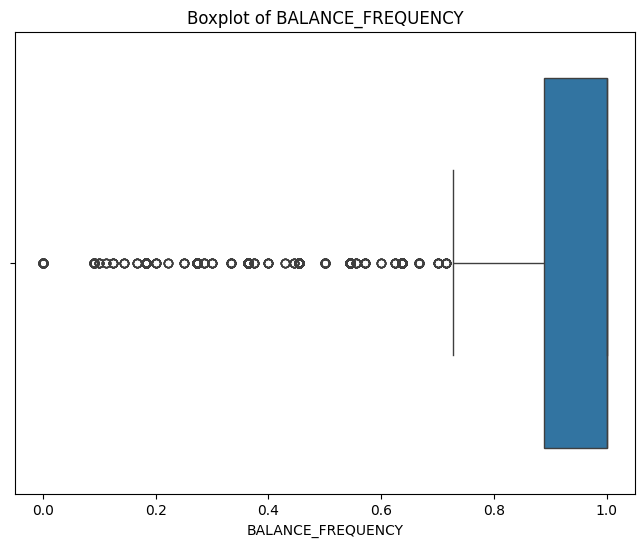

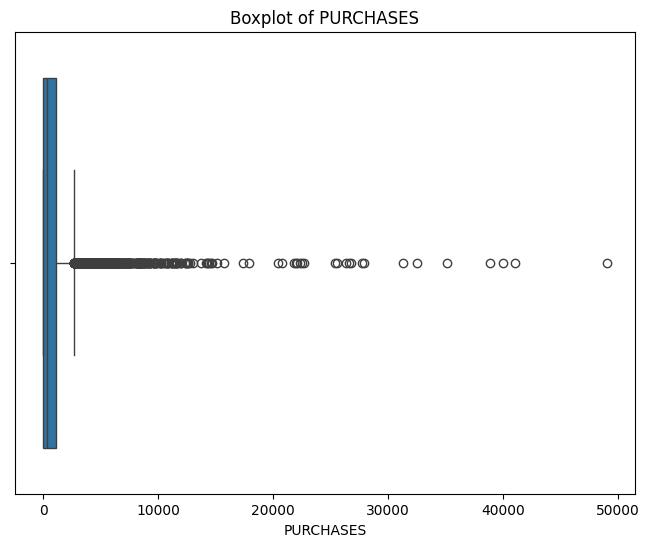

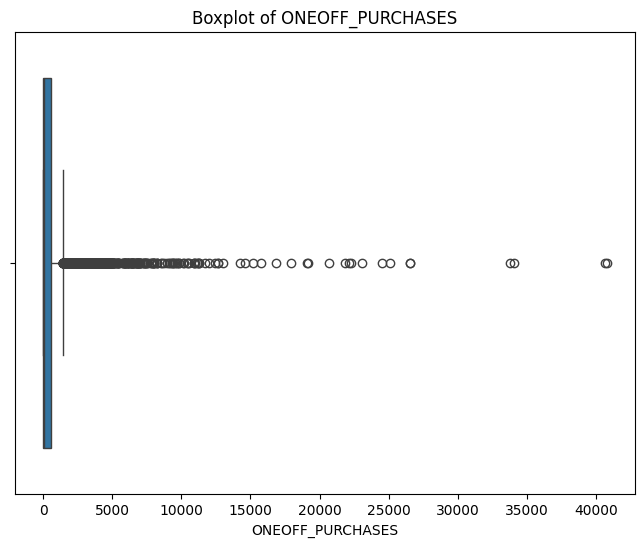

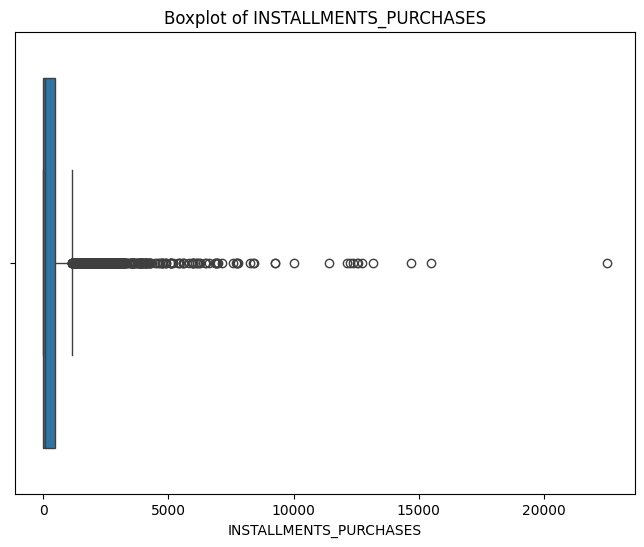

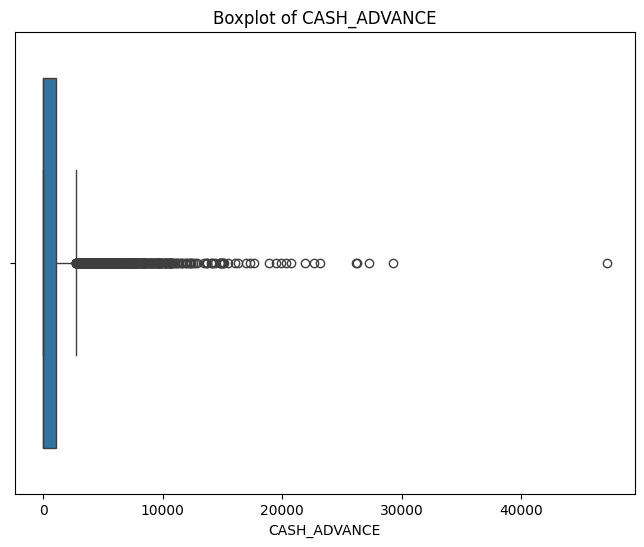

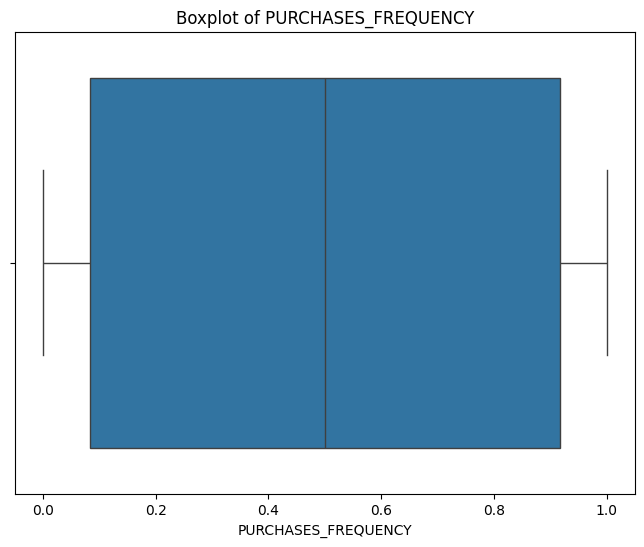

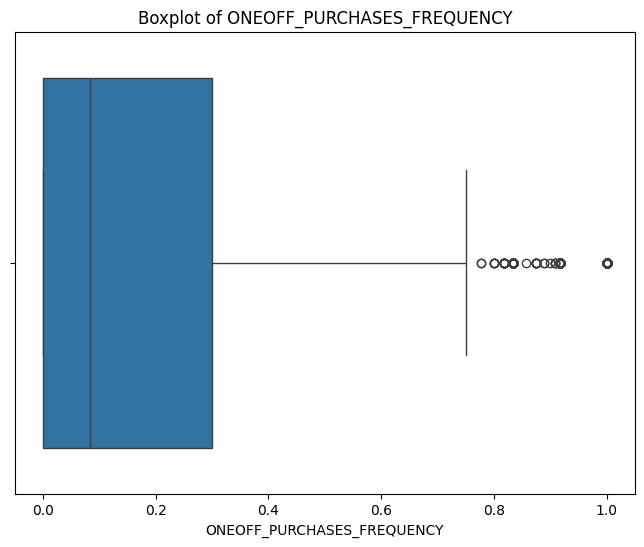

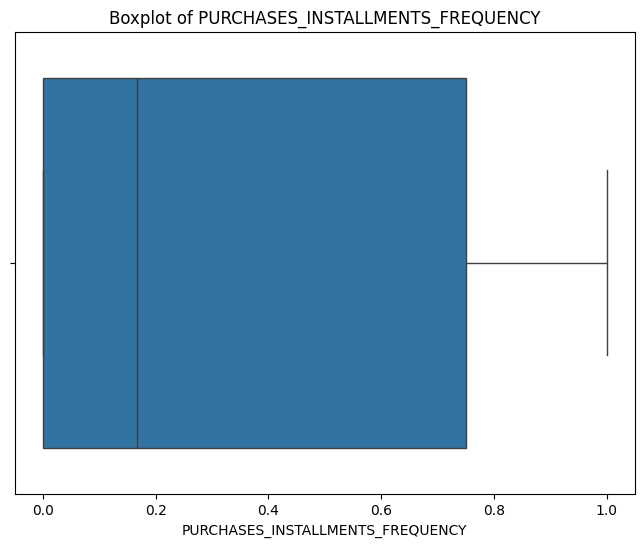

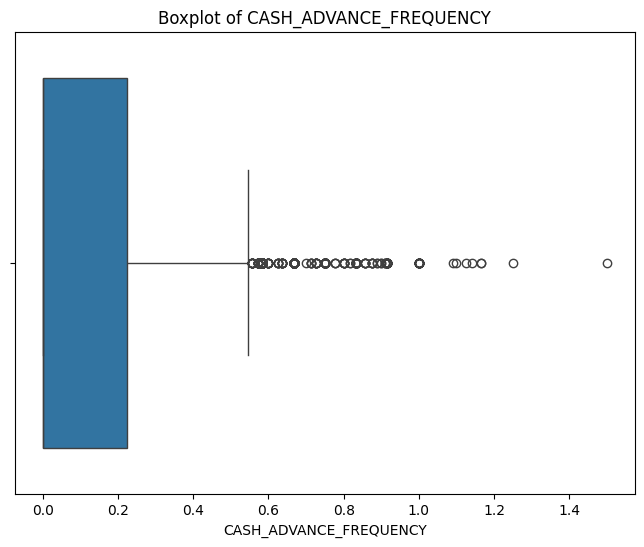

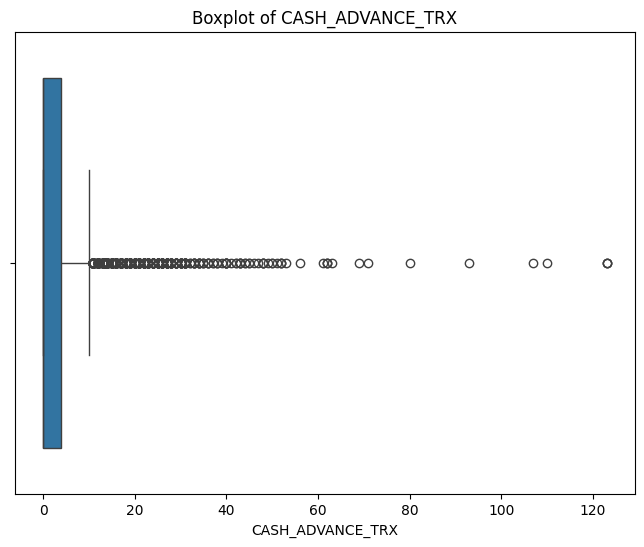

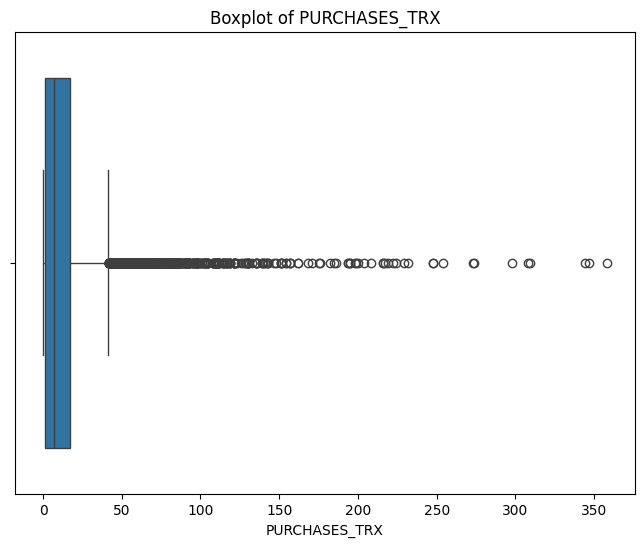

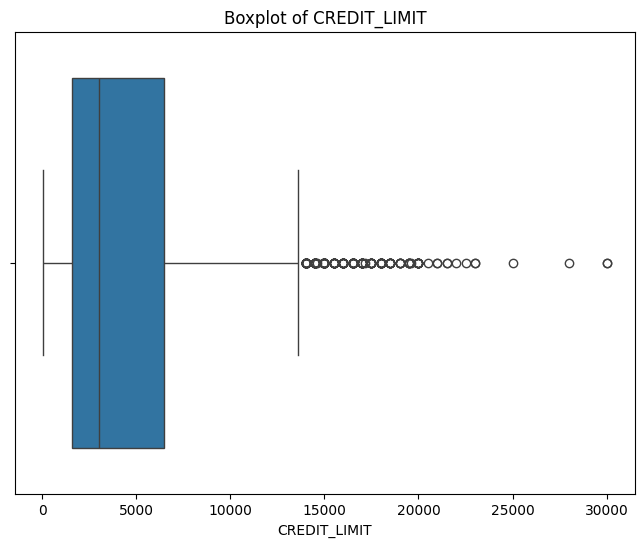

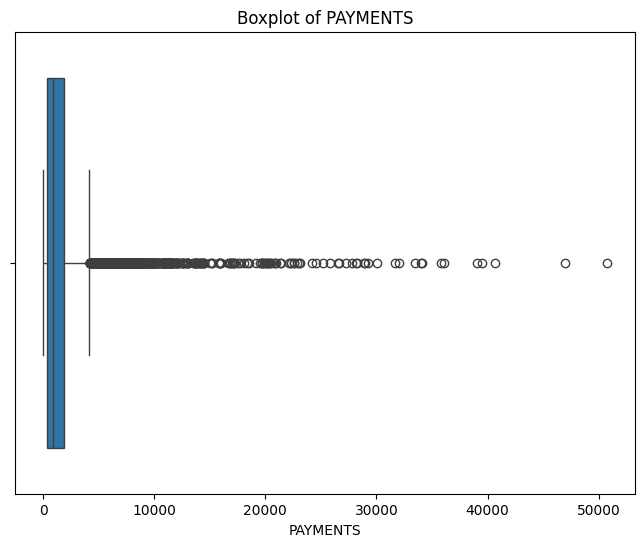

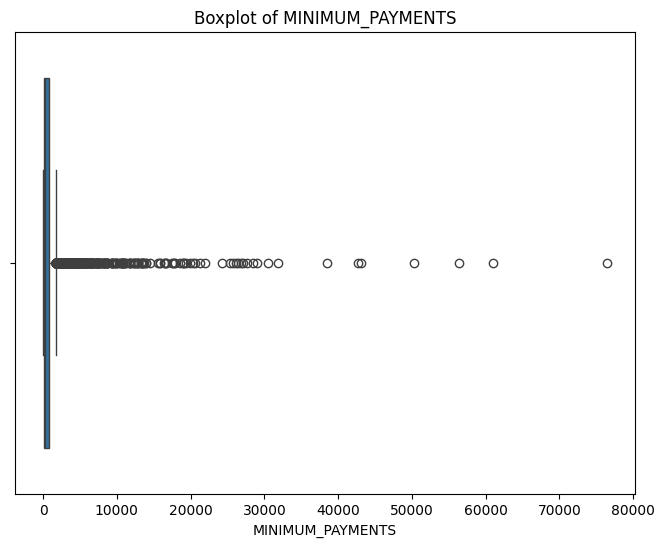

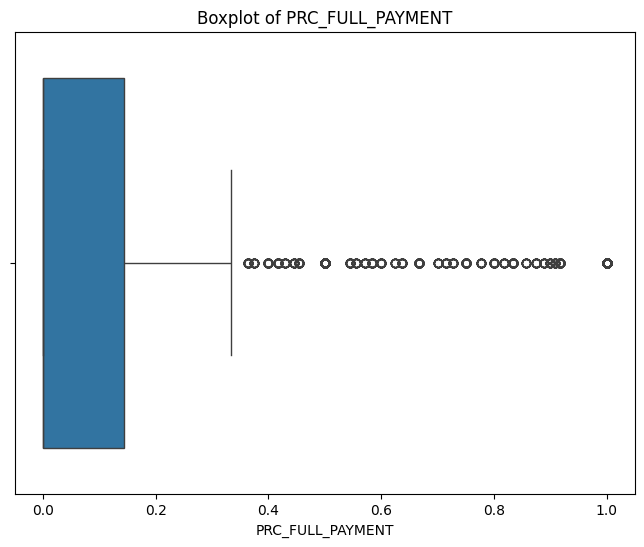

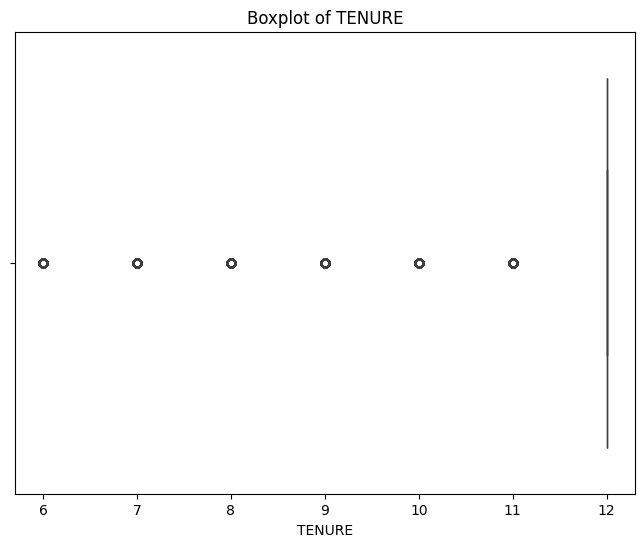

In [67]:
plt.figure(figsize=(15, 15))
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

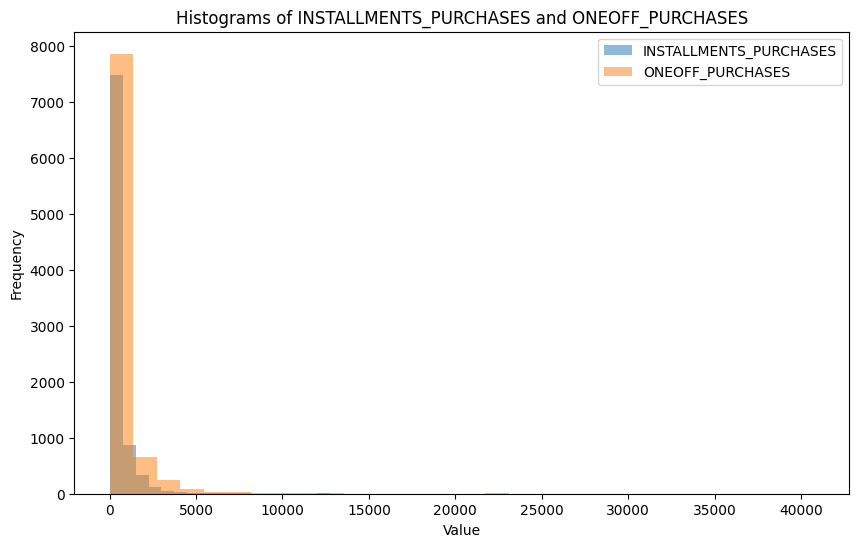

In [68]:
#plot INSTALLMENTS_PURCHASES vs ONEOFF_PURCHASES hist

plt.figure(figsize=(10, 6))
plt.hist(df['INSTALLMENTS_PURCHASES'], bins=30, alpha=0.5, label='INSTALLMENTS_PURCHASES')
plt.hist(df['ONEOFF_PURCHASES'], bins=30, alpha=0.5, label='ONEOFF_PURCHASES')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of INSTALLMENTS_PURCHASES and ONEOFF_PURCHASES')
plt.legend()
plt.show()


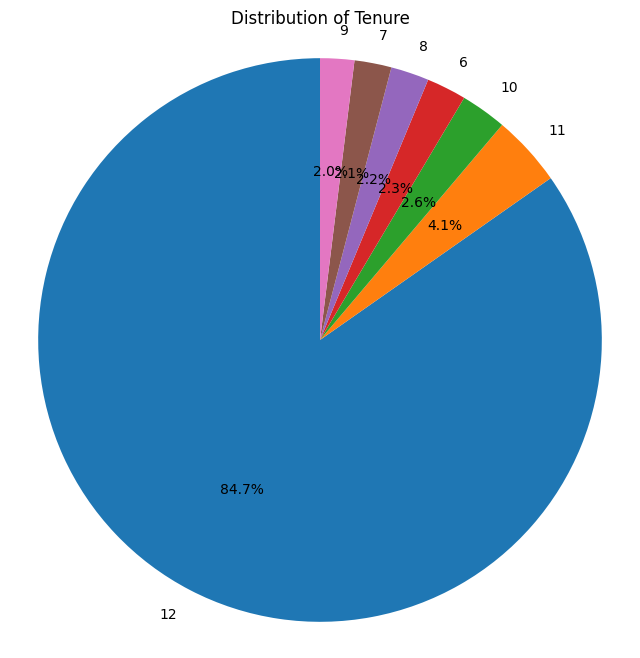

In [69]:
# Assuming you want a pie chart of the 'TENURE' column
tenure_counts = df['TENURE'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(tenure_counts, labels=tenure_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Tenure')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


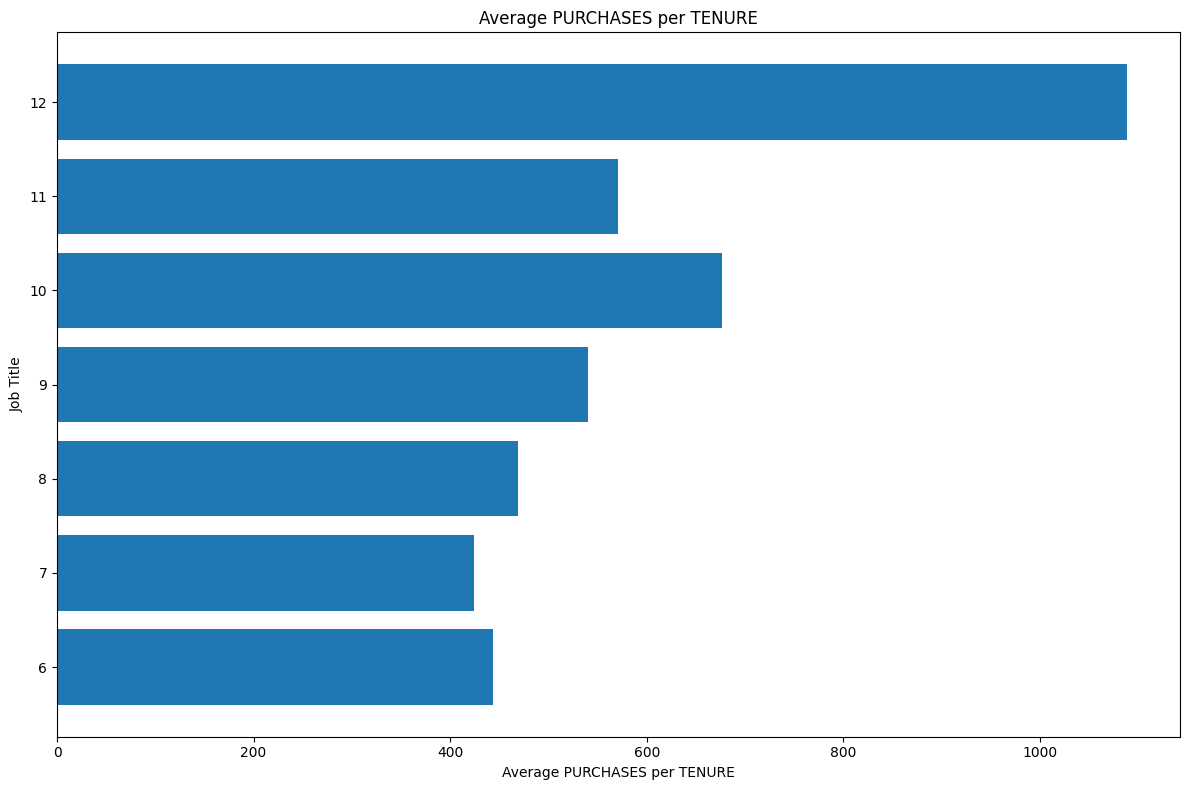

In [70]:
df_grouped = df.groupby('TENURE')['PURCHASES'].mean().reset_index()

# Sort the dataframe by average Applicants_per_Day in descending order
df_sorted = df_grouped.sort_values(by='PURCHASES', ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12,8))
plt.barh(df_sorted['TENURE'], df_sorted['PURCHASES'])
plt.xlabel('Average PURCHASES per TENURE')
plt.ylabel('Job Title')
plt.title('Average PURCHASES per TENURE')
plt.tight_layout()
plt.show()


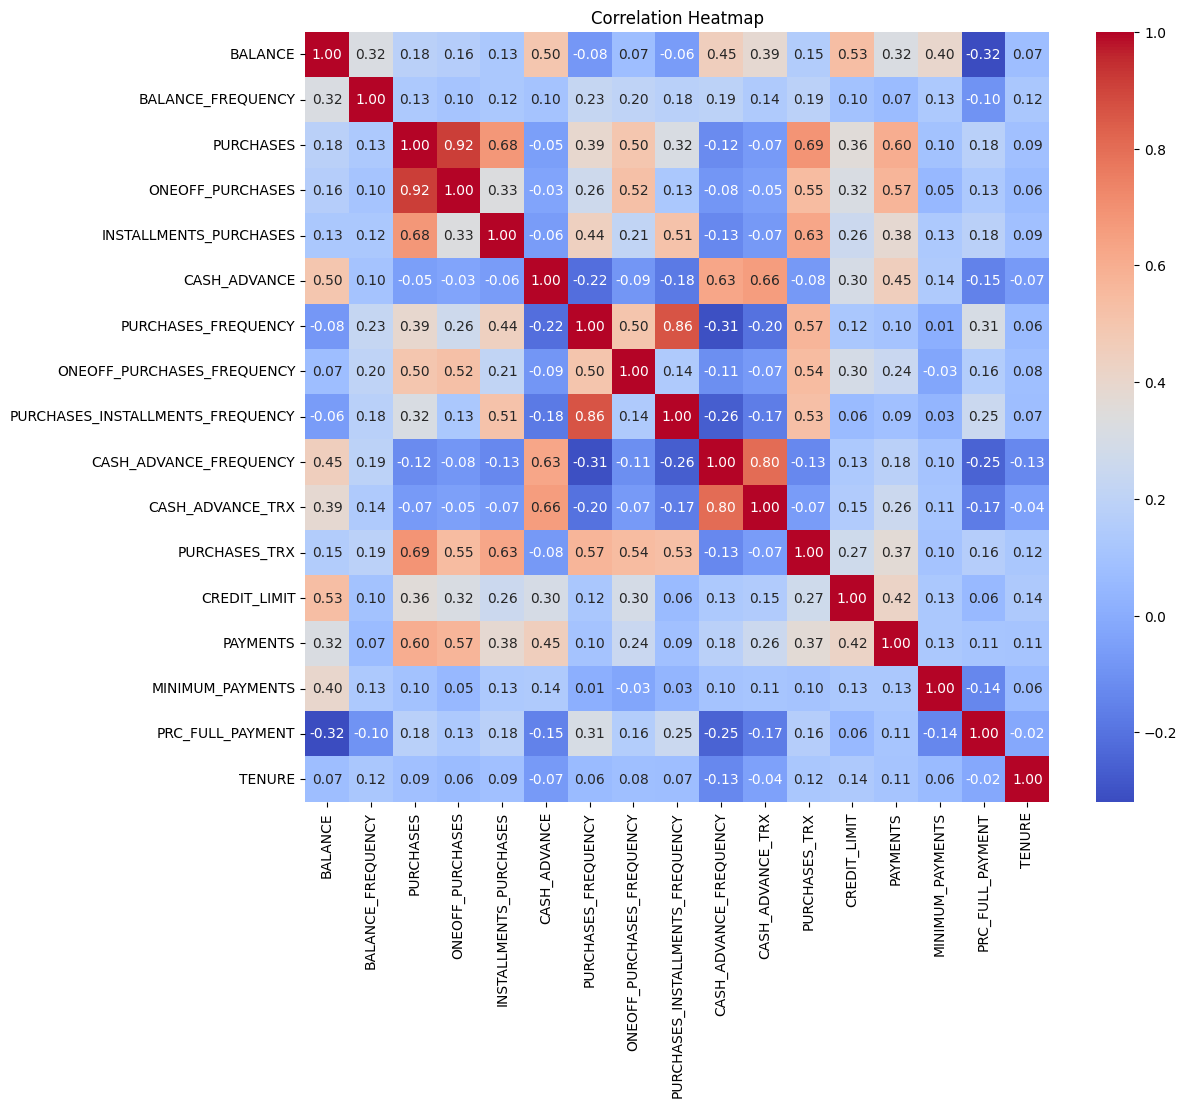

In [71]:
# heatmap of correlations
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


### ⚠️*Key take away*

*   Huge skewness in the dataset that needs to be fixed

*   Purchases are highly correlated with one-off purchases and transaction count, indicating redundancy—keep one.

*  Installment features are strongly related—can be grouped into a single metric.
*   Cash advance variables (amount, frequency, transactions) are tightly linked—only one is needed.


*   Balance and credit limit are moderately correlated—limit can reflect customer tier.


*   Payment behaviors are mostly uncorrelated with other features, so they provide unique insights and should be retained.






not dropping any column now

# 5. **⚙️Preprocessing**
---

#### 5.1. fixing the skewness in data






trying 2 ways

2.393386042571806


<ipython-input-127-00bbe90b44de>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BALANCE'], kde=True, bins=30)


<Axes: xlabel='BALANCE', ylabel='Density'>

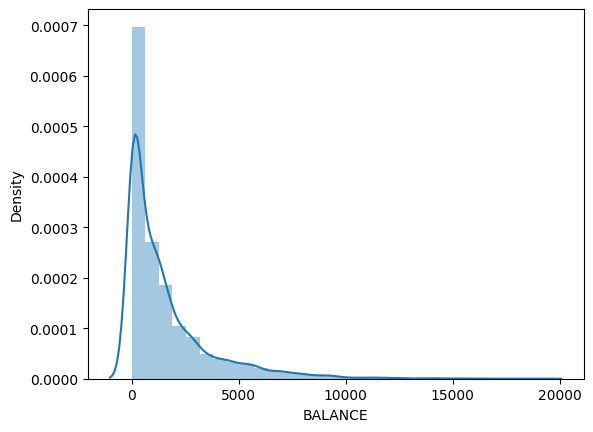

In [127]:
#original skewness value
print(df['BALANCE'].skew())
sns.distplot(df['BALANCE'], kde=True, bins=30)



*   **Square Root Transformation** to reduce the right skewness in all features, making its distribution more symmetric and suitable for clustering or modeling.
(try on one column as a test)


0.829497857072557


<ipython-input-128-9fa4f071d81b>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BALANCE_LOG'], kde=True, bins=30)


<Axes: xlabel='BALANCE_LOG', ylabel='Density'>

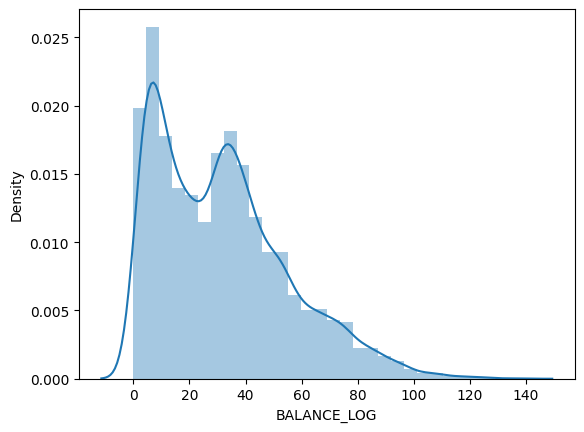

In [128]:
df['BALANCE_LOG'] = np.sqrt(df["BALANCE"])
print(df['BALANCE_LOG'].skew())
sns.distplot(df['BALANCE_LOG'], kde=True, bins=30)



*   **Log Transformation** and **Box-Cox** transformation techniques.



log function of 0 is undefined because no exponent of a positive base equals zero so we add 1 for all the data to fix that

In [129]:
df['BALANCE_ONE'] = df['BALANCE']+1

-0.8610205518180273


<ipython-input-130-3dfd421870b9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BALANCE_LOG_ONE'], kde=True, bins=30)


<Axes: xlabel='BALANCE_LOG_ONE', ylabel='Density'>

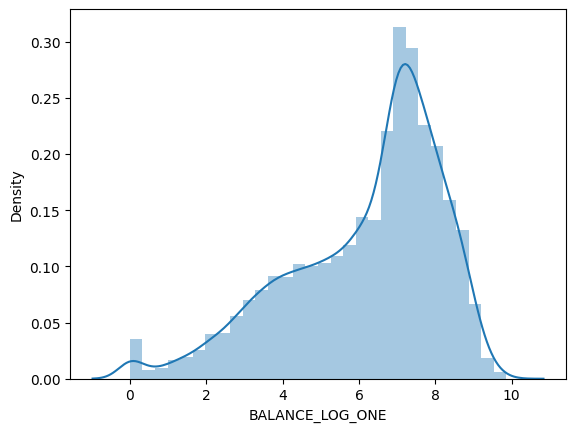

In [130]:
df['BALANCE_LOG_ONE'] = np.log(df['BALANCE_ONE'])
print(df['BALANCE_LOG_ONE'].skew())
sns.distplot(df['BALANCE_LOG_ONE'], kde=True, bins=30)

-0.11942824194609196


<ipython-input-131-9052aed78acb>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['BALANCE_BOX'], kde=True, bins=30)


<Axes: xlabel='BALANCE_BOX', ylabel='Density'>

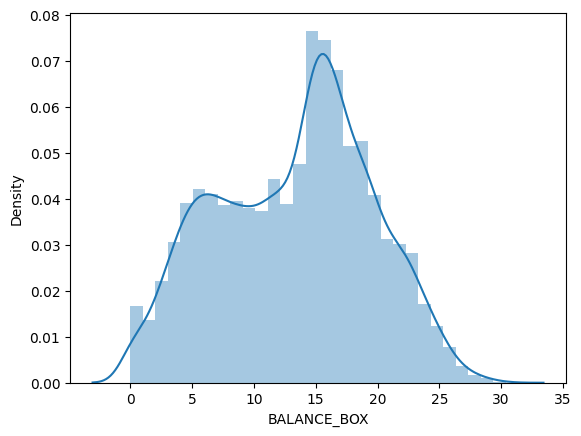

In [131]:
# Shift values to make them positive if necessary
df["BALANCE_BOX"], lambda_ = stats.boxcox(df["BALANCE"] + 1)
#Adding 1 to BALANCE ensures all values are positive
#lambda_ is the calculated optimal Box-Cox transformation parameter

print(df['BALANCE_BOX'].skew())
sns.distplot(df['BALANCE_BOX'], kde=True, bins=30)

### ⚠️*Key take away*

the second way is much better than the previous way (0.829) and ofcourse better than the original skewness value.
the skewness of the second one is (-0.119)
now apply it to all the data columns

In [132]:
#drop these columns BALANCE_LOG	BALANCE_ONE	BALANCE_LOG_ONE	BALANCE_BOX

df = df.drop(columns=['BALANCE_LOG', 'BALANCE_ONE', 'BALANCE_LOG_ONE', 'BALANCE_BOX'])


In [133]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

-0.2896375487774825
-1.1609862739775048
-0.6091260298609089
-0.0073316135251879026
-0.1674314219141975
0.10363965209388197
-0.10226341108855964
0.47612804062063185
0.16811012810067527
0.46163386390766803
0.27700924761724827
-0.17230994879612785
-0.026281405523078175
-0.030435437807588936
0.10481537776459059
0.9083381616457742
-1.978989514456317


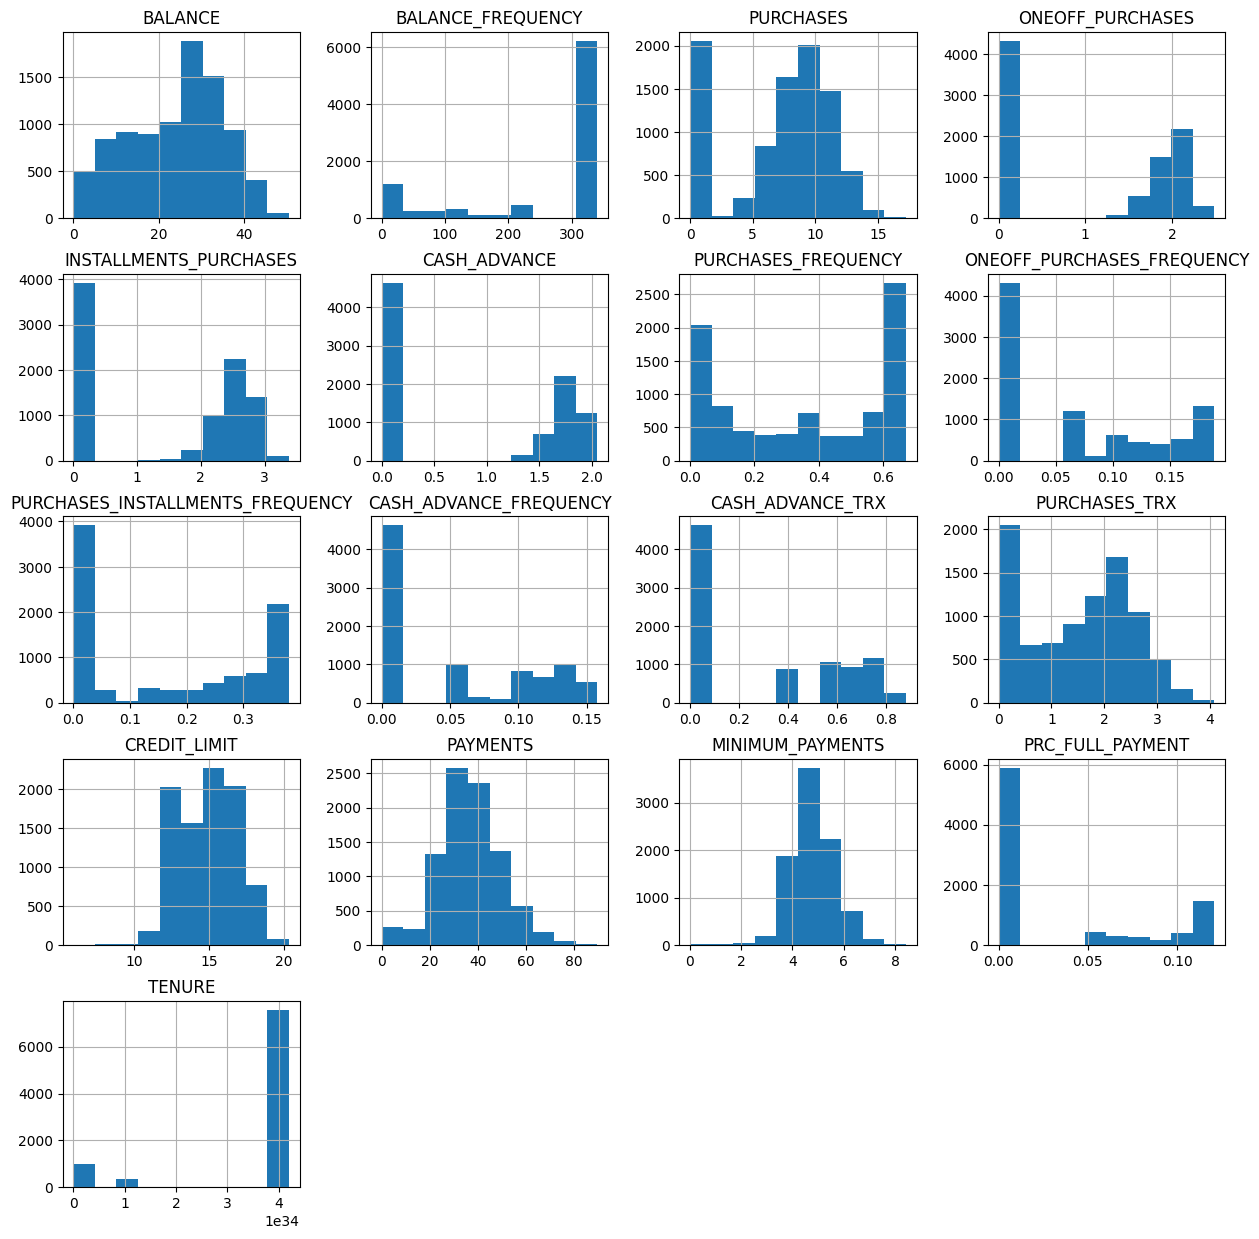

In [134]:
for col in numeric_cols:
  df[col] = df[col]+1
  df[col] = np.log(df[col])
  df[col], lambda_ = stats.boxcox(df[col]+1)
#Adding 1 to ensures all values are positive
#lambda_ is the calculated optimal Box-Cox transformation parameter
  print(df[col].skew())
df.hist(figsize=(15,15))
plt.show()

<Figure size 1500x1500 with 0 Axes>

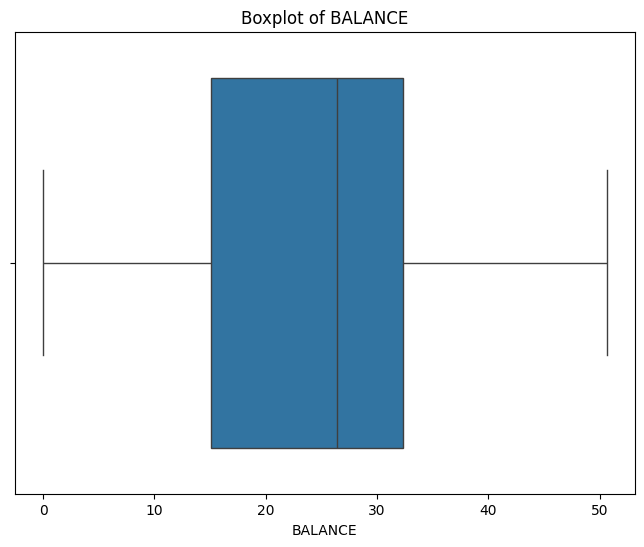

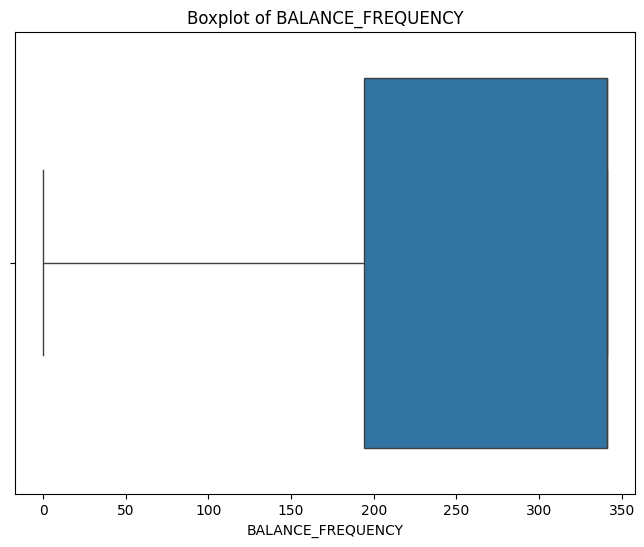

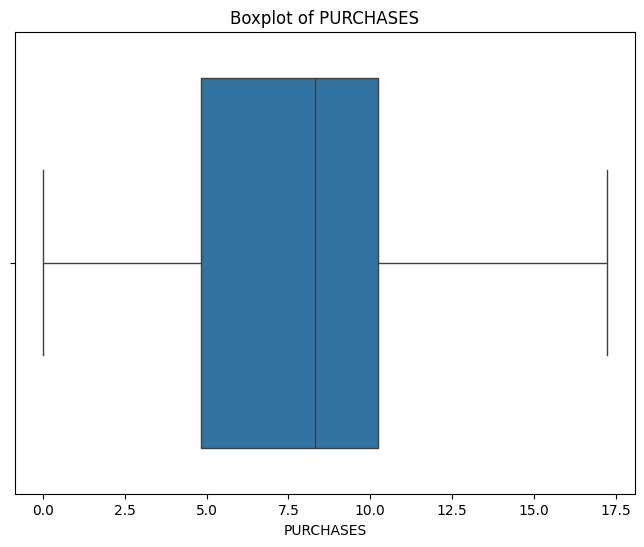

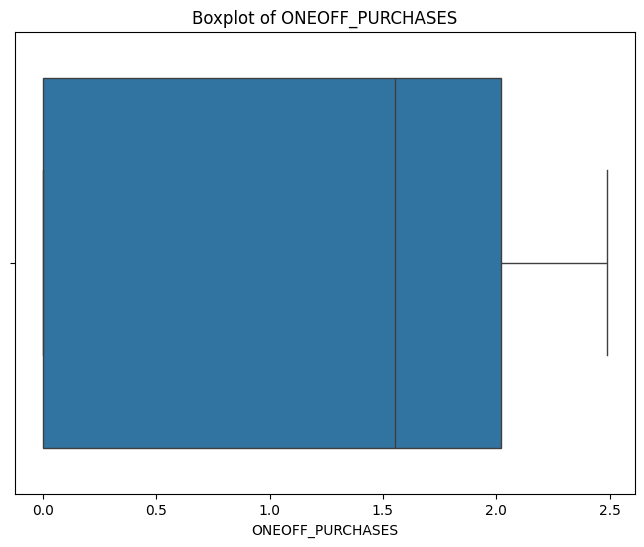

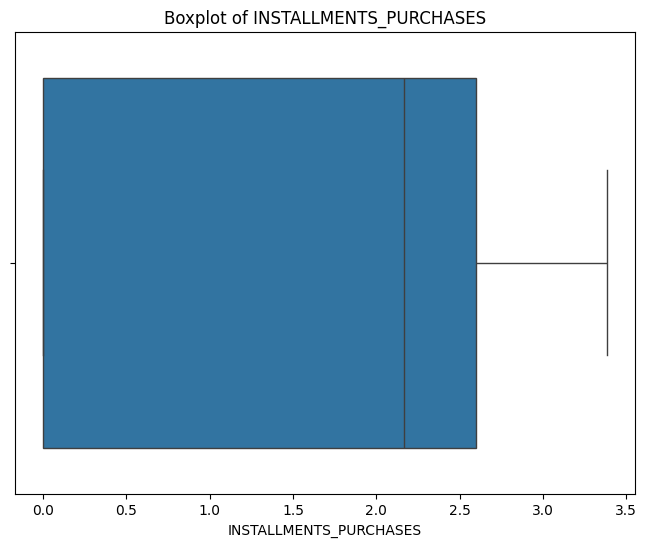

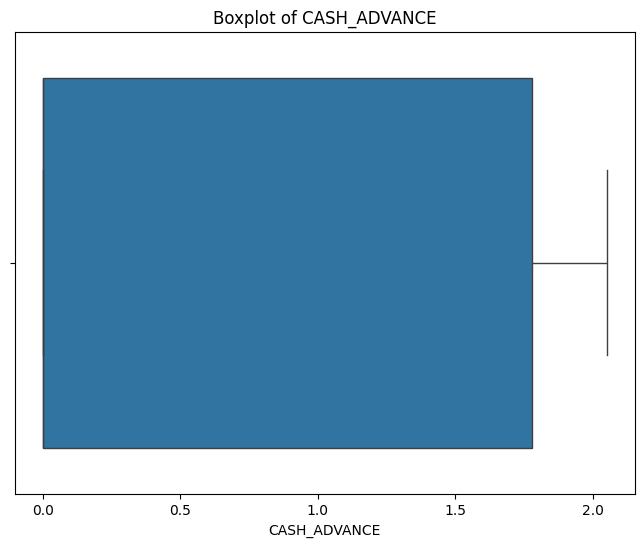

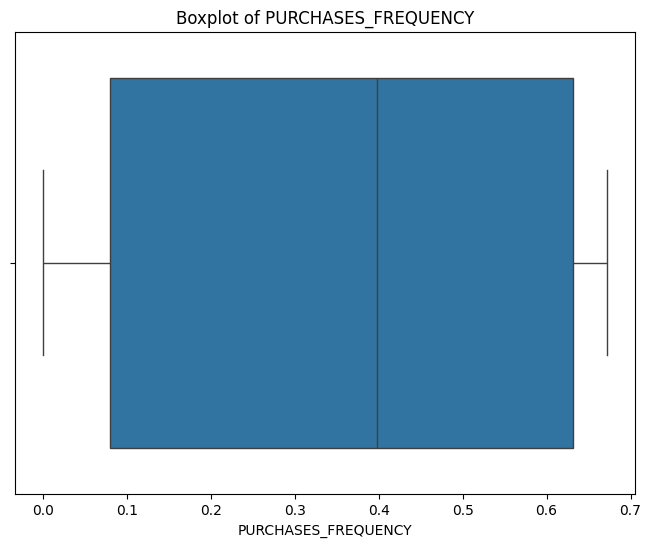

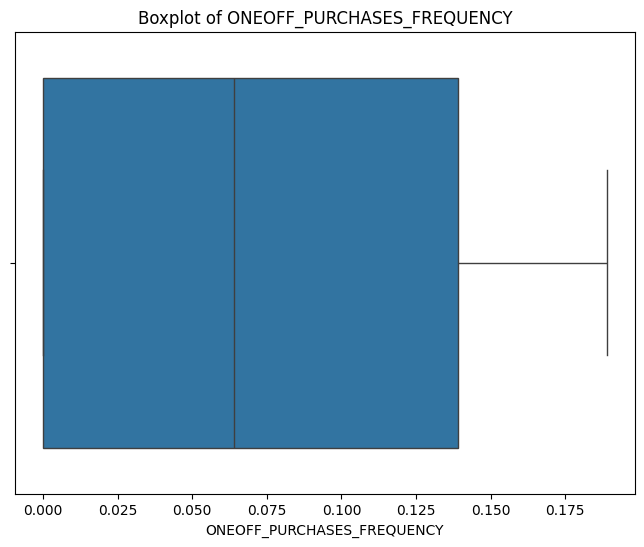

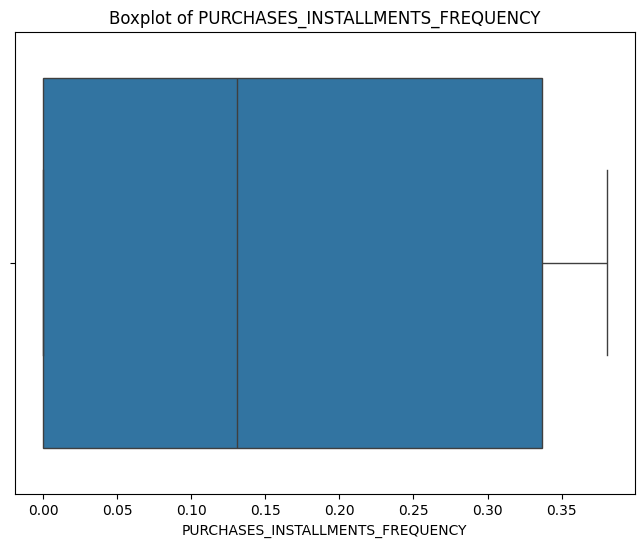

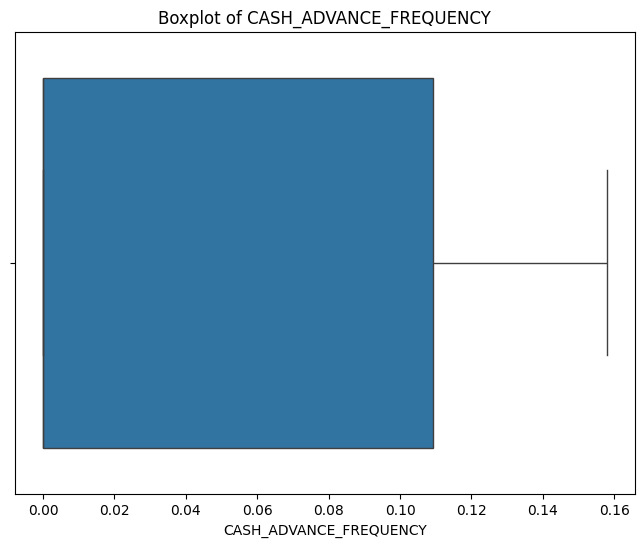

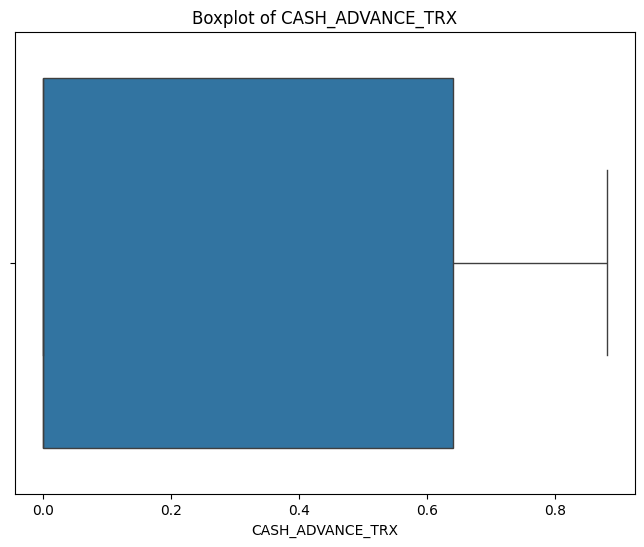

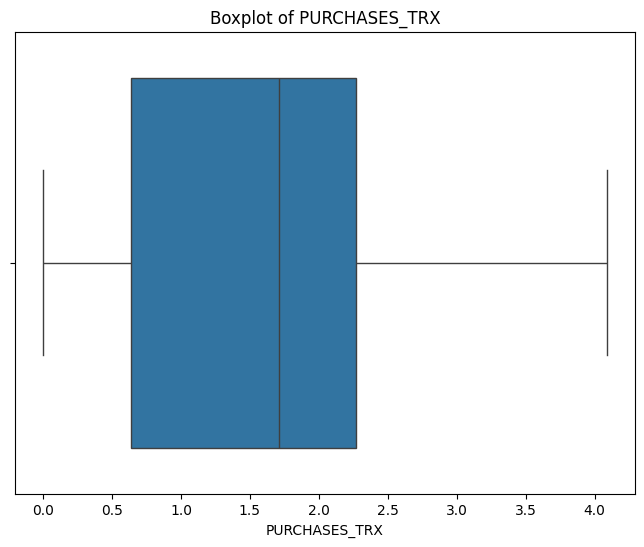

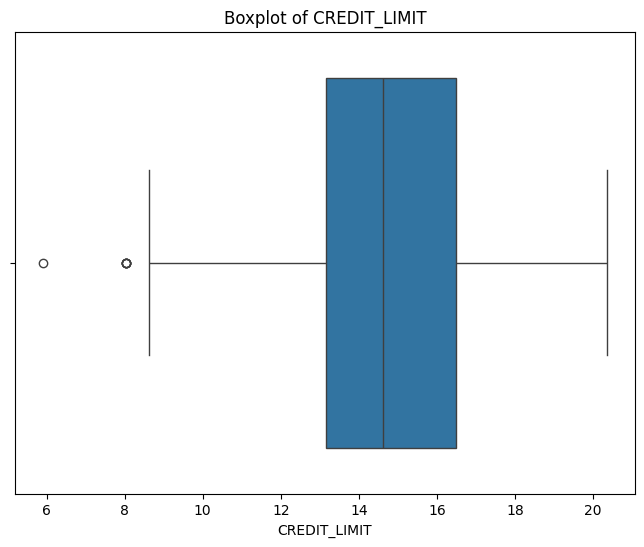

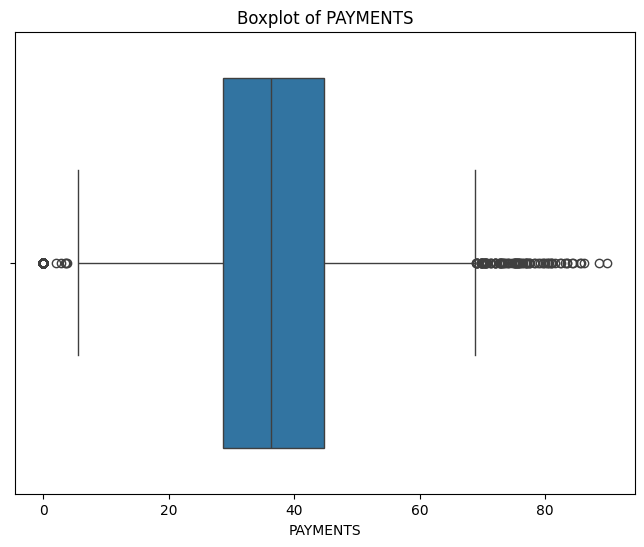

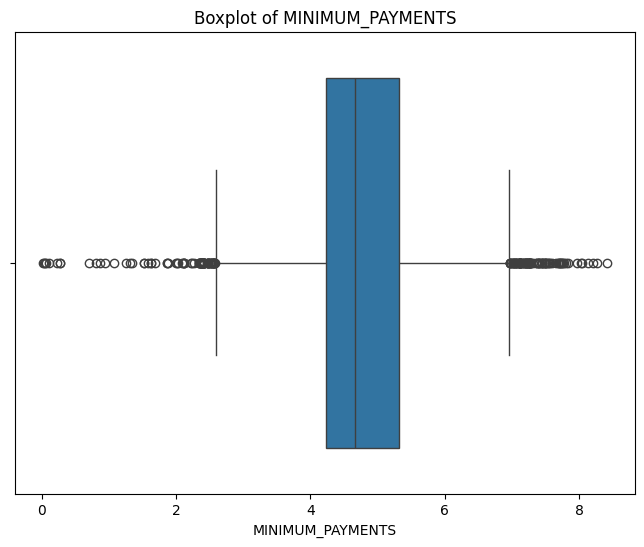

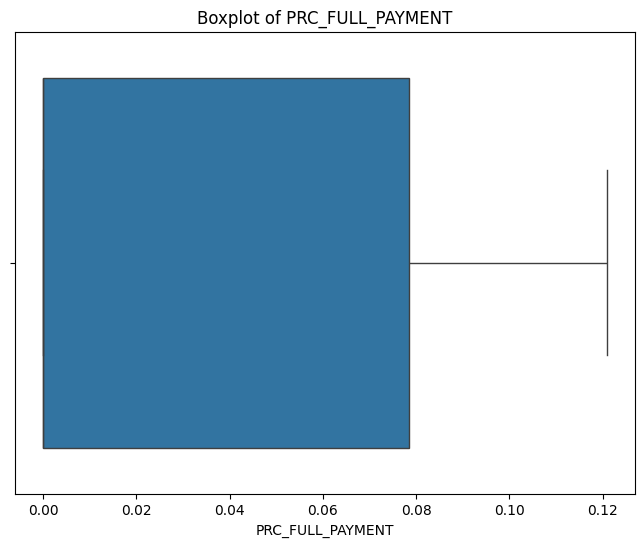

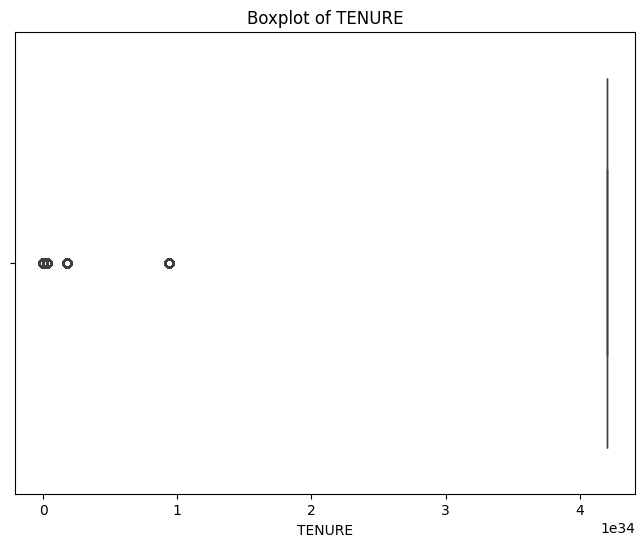

In [80]:
#check outliers
plt.figure(figsize=(15, 15))
for column in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


#### 5.2. Scaling & Normalization

In [135]:
scaler = StandardScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

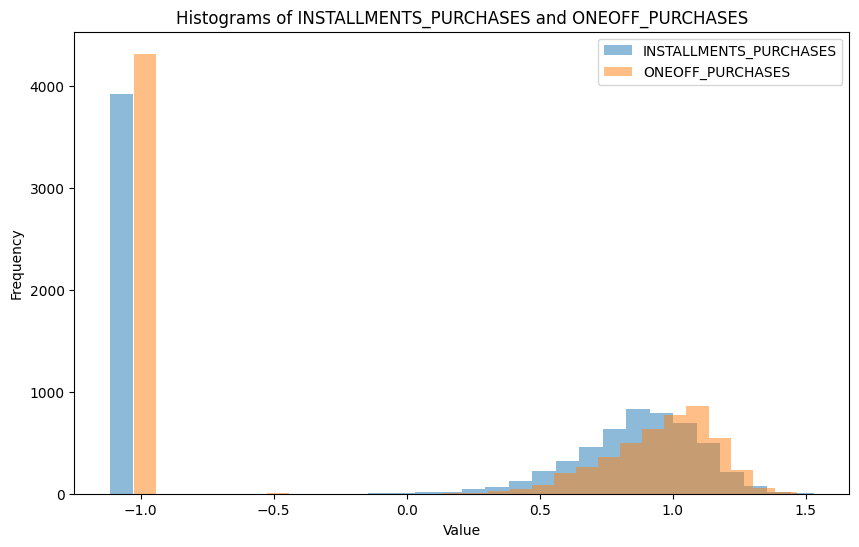

In [136]:
#plot INSTALLMENTS_PURCHASES vs ONEOFF_PURCHASES hist

plt.figure(figsize=(10, 6))
plt.hist(df['INSTALLMENTS_PURCHASES'], bins=30, alpha=0.5, label='INSTALLMENTS_PURCHASES')
plt.hist(df['ONEOFF_PURCHASES'], bins=30, alpha=0.5, label='ONEOFF_PURCHASES')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histograms of INSTALLMENTS_PURCHASES and ONEOFF_PURCHASES')
plt.legend()
plt.show()


#### 5.3. Dimensionality Reduction

        PC1       PC2
0  0.033376 -3.096239
1 -3.561224  0.685656
2  1.320373  1.285376
3 -1.490420 -0.521192
4 -0.841448 -1.241563
Explained Variance Ratio: [0.36086499 0.21874905]


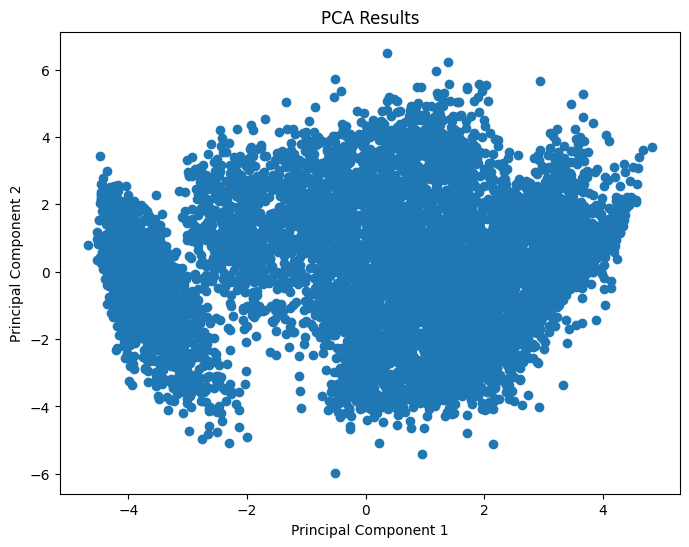

In [137]:
pca = PCA(n_components=2)  # Reduce to 2 principal components
df_pca = pca.fit_transform(df)

# Create a DataFrame for the PCA results
df_pca = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])

print(df_pca.head())

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")

# Visualize the PCA results (optional)
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Results')
plt.show()

### ⚠️*Key take away*

* Together, PC1 and PC2 in the PCA capture about 58% of the dataset’s structure which is not bad but not the best

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


       UMAP1      UMAP2
0   1.734895  11.749556
1  15.998672  10.020932
2  -3.158858  -0.067246
3  12.040950   1.481431
4  -3.905026   1.557084


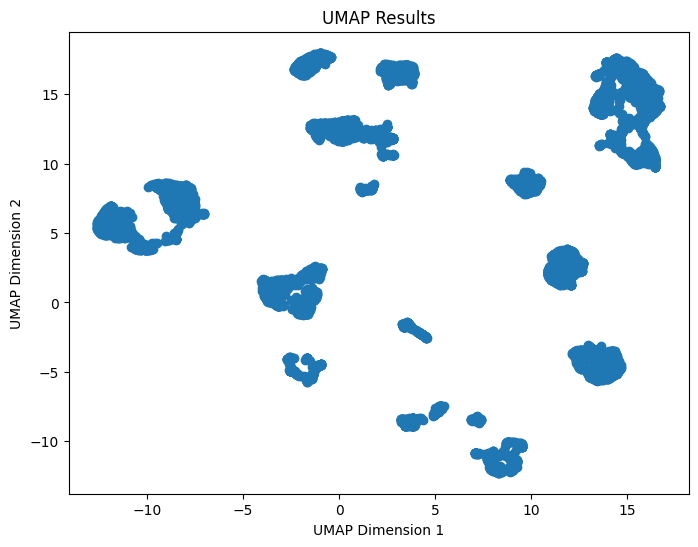

In [138]:
#applying UMAP
reducer = umap.UMAP(n_components=2, random_state=42) # Reduce to 2 dimensions
df_umap = reducer.fit_transform(df)

# Create a DataFrame for the UMAP results
df_umap = pd.DataFrame(data=df_umap, columns=['UMAP1', 'UMAP2'])

print(df_umap.head())

# Visualize the UMAP results (optional)
plt.figure(figsize=(8, 6))
plt.scatter(df_umap['UMAP1'], df_umap['UMAP2'])
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('UMAP Results')
plt.show()


### ⚠️*Key take away*

the higher silhouette score for UMAP indicates that, on average, points are better matched to their own cluster and more clearly separated from others—so UMAP is the better choice for generating your low-dimensional embedding in this case.

# 6. Modeling and Clustering

### Deciding best K value

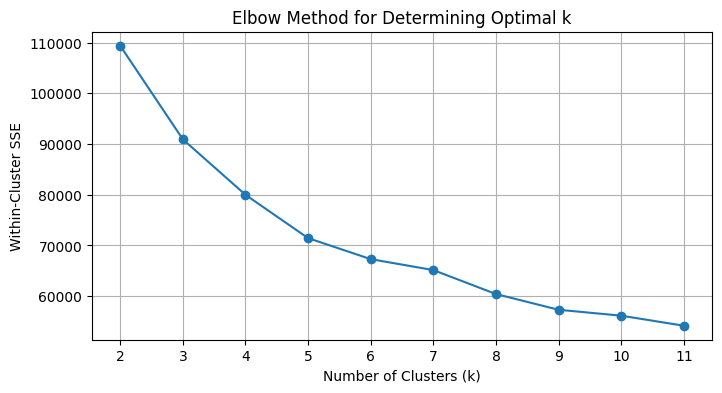

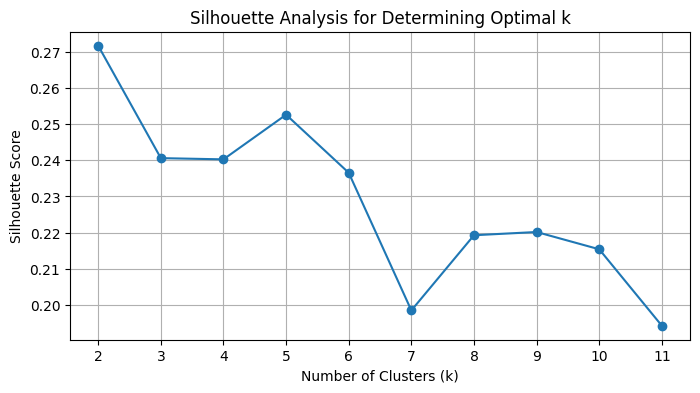

In [139]:
# Prepare lists to hold metrics
sse = []
silhouette_scores = []
K = range(2, 12)  # Evaluate for k = 1 to 12

for k in K:
    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)

    # Inertia: sum of squared distances to cluster center (Within-cluster SSE)
    sse.append(kmeans.inertia_)

    # Silhouette Score: measure of how similar an object is to its own cluster vs other clusters
    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(df, labels))

# Plot the Elbow Method results
plt.figure(figsize=(8, 4))
plt.plot(K, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster SSE')
plt.title('Elbow Method for Determining Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()

# Plot the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Determining Optimal k')
plt.xticks(K)
plt.grid(True)
plt.show()


In [155]:
# Fit (eps & min_samples tuned by eyeballing k-distance plot)
db = DBSCAN(eps=2.1, min_samples=10).fit(df)
df_with_clusters['DBSCAN_Cluster'] = db.labels_

# Count labeled vs. noise (-1)
df_with_clusters['DBSCAN_Cluster'].value_counts().sort_index()


,count
DBSCAN_Cluster,
-1,188
0,4052
1,3429
2,497
3,377
4,134
5,259
6,14


### ⚠️*Key take away*

*   The Elbow Method and Silhouette Score optimize for compact, spherical clusters (favoring k = 3 in your case).
*   DBSCAN, by contrast, reveals the data’s density structure, uncovering finer-grained groups that variance-based methods miss.

* While DBSCAN revealed seven natural clusters, one cluster contained only 14 customers—too small for a meaningful segment. Merging that tiny group yields six robust clusters that balance data-driven with practical business size.

# 🚨VIMP NOTE:

chose DBSCAN instead of relying on the elbow method because DBSCAN doesn’t require specifying the number of clusters in advance. It’s more effective for detecting clusters of arbitrary shape and identifying outliers, which suits this dataset better than assuming spherical, equally-sized clusters like K-Means does.

#### Clustering

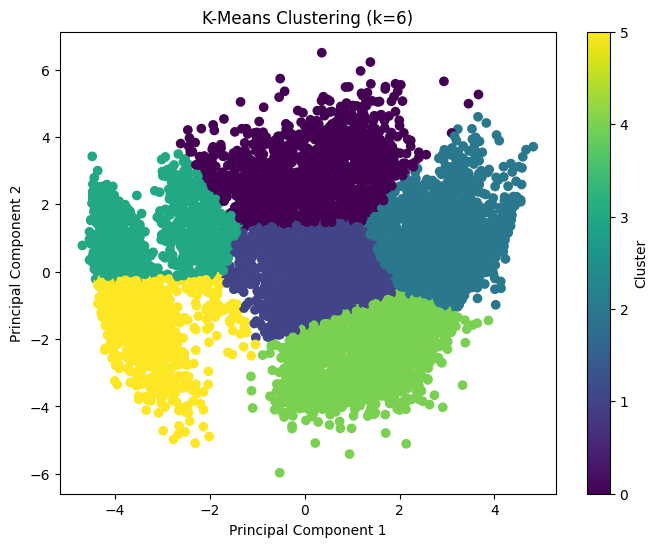

In [142]:
#plot k means with k = 6 after PCA

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(df_pca)
labels_pca = kmeans.labels_

# Visualize the clusters (example using the first two principal components)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_pca)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=labels_pca, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering (k=6)')
plt.colorbar(label='Cluster')
plt.show()


In [151]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-1.275107,-1.011384,-0.207575,-1.024527,0.596042,-0.960289,-0.740418,-0.920047,-0.565175,-0.892678,-0.929055,-0.510036,-1.430197,-1.022983,-0.824666,-0.686502,0.421822
1,1.039642,-0.354318,-1.631100,-1.024527,-1.116789,1.220250,-1.309711,-0.920047,-1.019587,1.130114,1.061133,-1.451478,0.925420,1.289739,0.910411,1.284561,0.421822
2,0.870196,0.622594,0.588896,1.038197,-1.116789,-0.960289,1.190759,1.688113,-1.019587,-0.892678,-0.929055,0.534646,1.012610,-0.276868,0.461643,-0.686502,0.421822
3,0.605522,-1.705611,0.855059,1.123270,-1.116789,0.861942,-1.012980,-0.034124,-1.019587,0.185159,0.371261,-0.834576,1.012610,-2.778377,-0.129723,-0.686502,0.421822
4,0.166636,0.622594,-0.813011,0.332071,-1.116789,-0.960289,-1.012980,-0.034124,-1.019587,-0.892678,-0.929055,-0.834576,-1.218374,-0.213672,-0.338548,-0.686502,0.421822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-1.402964,0.622594,0.207916,-1.024527,0.828309,-0.960289,1.190759,-0.920047,1.170493,-0.892678,-0.929055,0.113279,-1.430197,-0.723019,-1.746459,1.698144,-2.543227
8946,-1.530821,0.622594,0.219412,-1.024527,0.834179,-0.960289,1.190759,-0.920047,1.170493,-0.892678,-0.929055,0.113279,-1.430197,-0.829807,-0.129723,-0.686502,-2.543227
8947,-1.468223,-0.920002,-0.055915,-1.024527,0.685772,-0.960289,0.884278,-0.920047,0.958078,-0.892678,-0.929055,0.004363,-1.430197,-1.524059,-1.285033,1.364850,-2.543227
8948,-1.634411,-0.920002,-1.631100,-1.024527,-1.116789,0.587369,-1.309711,-0.920047,-1.019587,0.778345,0.747335,-1.451478,-2.217431,-1.732192,-1.629928,1.364850,-2.543227


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



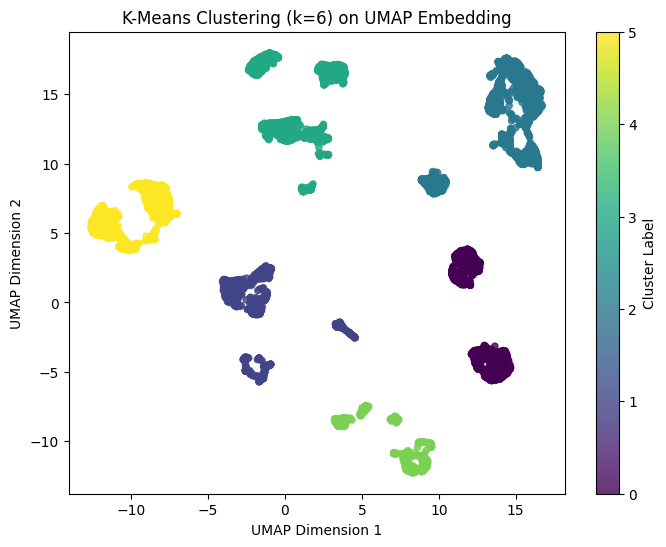

In [178]:
# 1. Compute a 2D UMAP embedding of your original data
reducer = umap.UMAP(n_components=2, random_state=42)
df_umap = reducer.fit_transform(df)   # replace X with your original feature matrix

# 2. Fit K-Means (k=6) on that UMAP embedding
kmeans = KMeans(n_clusters=6, random_state=42)
labels_umap = kmeans.fit_predict(df_umap)

# 3. Plot the UMAP embedding colored by K-Means cluster
plt.figure(figsize=(8, 6))
plt.scatter(
    df_umap[:, 0], df_umap[:, 1],
    c=labels_umap, cmap='viridis', s=20, alpha=0.8
)
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('K-Means Clustering (k=6) on UMAP Embedding')
plt.colorbar(label='Cluster Label')
plt.show()

In [179]:
# Assuming df_umap is already defined as in your provided code.
df_ploting = pd.DataFrame({'UMAP1': df_umap[:, 0], 'UMAP2': df_umap[:, 1]})
print(df_ploting.head())

       UMAP1      UMAP2
0   1.734895  11.749556
1  15.998672  10.020932
2  -3.158858  -0.067246
3  12.040950   1.481431
4  -3.905026   1.557084


In [153]:
from sklearn.metrics import silhouette_score
# after fitting KMeans on each embedding:
sil_pca  = silhouette_score(df, labels_pca)
sil_umap = silhouette_score(df, labels_umap)
print(f"PCA Silhouette: {sil_pca:.3f}, UMAP Silhouette: {sil_umap:.3f}")


PCA Silhouette: 0.166, UMAP Silhouette: 0.191


### ⚠️*Key take away*

UMAP is considered better in this case as it achieved a higher Silhouette score (0.191) compared to PCA (0.166), indicating more well-defined clusters. (in K-means)

In [156]:
# Add the labels to the original (non-normalized) dataframe
df_with_clusters.drop('DBSCAN_Cluster', axis=1, inplace=True)


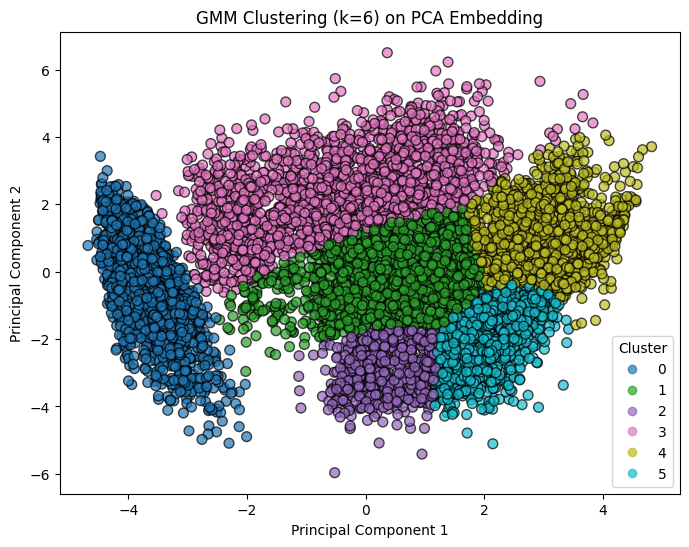

In [159]:
# — GMM Clustering on the PCA embedding —
# 1. Fit GMM on the PCA-transformed data
gmm = GaussianMixture(n_components=6, covariance_type='full',
                       n_init=10, random_state=42)
gmm.fit(df_pca)
labels_gmm_pca = gmm.predict(df_pca)


# 2. Plot the GMM clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(
    df_pca["PC1"], df_pca["PC2"],
    c=labels_gmm_pca,
    cmap='tab10',      # up to 10 distinct colors
    alpha=0.7,
    edgecolor='k',
    s=50
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('GMM Clustering (k=6) on PCA Embedding')
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


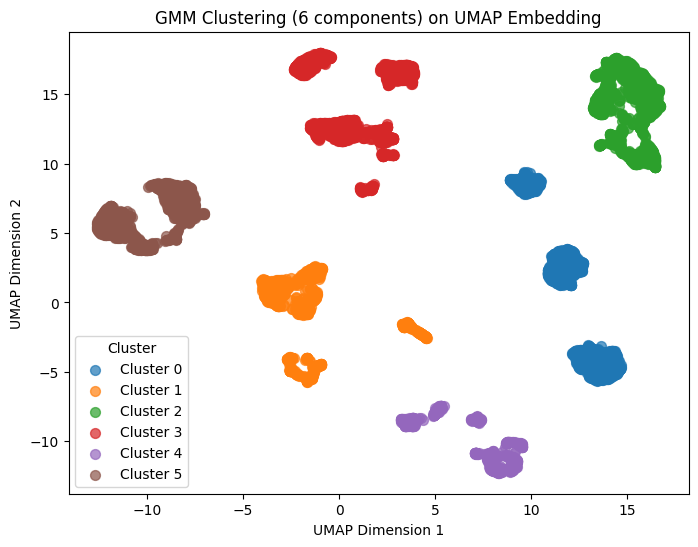

In [163]:
# 1. Compute a 2D UMAP embedding of your original data
reducer = umap.UMAP(n_components=2, random_state=42)
embedding = reducer.fit_transform(df)         # replace X with your feature matrix
df_umap = pd.DataFrame(embedding, columns=['UMAP1', 'UMAP2'])

# 2. Fit GMM (n_components=6) on the UMAP embedding and predict labels
gmm = GaussianMixture(n_components=6, covariance_type='full', random_state=42)
labels_gmm_umap = gmm.fit_predict(df_umap[['UMAP1', 'UMAP2']])

# 3. Plot the GMM clusters on the UMAP embedding
plt.figure(figsize=(8, 6))
# Convert labels_gmm_umap to a pandas Series to use .unique()
labels_gmm_umap_series = pd.Series(labels_gmm_umap)
for cluster in sorted(labels_gmm_umap_series.unique()):
    subset = df_umap[labels_gmm_umap == cluster]
    plt.scatter(
        subset['UMAP1'], subset['UMAP2'],
        label=f'Cluster {cluster}',
        alpha=0.7,
        s=50
    )
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.title('GMM Clustering (6 components) on UMAP Embedding')
plt.legend(title='Cluster')
plt.show()

## Comparing between the K-means vs Gmm and PCA vs UMAP

In [160]:
from sklearn.metrics import silhouette_score

#between k-means and GMM
sil_km_pca  = silhouette_score(df_pca, labels_pca)
sil_gmm_pca = silhouette_score(df_pca, labels_gmm_pca)
print(f"K-Means PCA silhouette: {sil_km_pca:.3f}")
print(f"GMM PCA silhouette:      {sil_gmm_pca:.3f}")


K-Means PCA silhouette: 0.394
GMM PCA silhouette:      0.378


In [164]:
from sklearn.metrics import silhouette_score

sil_km  = silhouette_score(df_umap, labels_umap)
sil_gmm = silhouette_score(df_umap, labels_gmm_umap)
print(f"K-Means UMAP silhouette: {sil_km:.3f}")
print(f"GMM UMAP silhouette:      {sil_gmm:.3f}")


K-Means UMAP silhouette: 0.652
GMM UMAP silhouette:      0.626


# Conclusion:

Using UMAP for dimensionality reduction followed by K-Means clustering is optimal, achieving the highest silhouette score (0.652).

In [167]:
# Calculate mean of each feature per cluster, excluding non-numeric columns
df_with_clusters['Cluster_Kmeans'] = labels_umap


In [168]:
cluster_summary = df_with_clusters.select_dtypes(include=np.number).groupby('Cluster_Kmeans').mean()
print(cluster_summary)

                    BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster_Kmeans                                                                  
0               2727.288772           0.962532  1479.970931       1005.581110   
1                662.930852           0.785185   867.273302        764.681984   
2               2374.422258           0.919146   108.764248          0.013067   
3                433.421426           0.782103   545.539071          0.027917   
4               1811.060859           0.835504   344.296064        228.878509   
5               1263.029788           0.940842  2559.838998       1567.044754   

                INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster_Kmeans                                                              
0                           474.615641   2011.475688             0.571940   
1                           102.682042      0.013898             0.449355   
2                           108.945118   19

In [169]:
# Train a simple tree to predict your K-Means cluster label
X = df
y = df_with_clusters["Cluster_Kmeans"]  # original k-means labels

tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X, y)

# Extract importances
# Use the columns from df_normalized to create the index, not df_with_clusters
feat_importance = pd.Series(tree.feature_importances_, index=df.columns)
feat_importance.sort_values(ascending=False).head(10)

,0
ONEOFF_PURCHASES,0.378426
TENURE,0.234282
CASH_ADVANCE_TRX,0.214271
INSTALLMENTS_PURCHASES,0.155418
PRC_FULL_PAYMENT,0.016925
MINIMUM_PAYMENTS,0.000271
PURCHASES_TRX,0.000271
PURCHASES_INSTALLMENTS_FREQUENCY,0.000136
BALANCE,0.000000
ONEOFF_PURCHASES_FREQUENCY,0.000000


In [170]:
# Calculate inertia for each cluster
inertia = kmeans.inertia_
print(f"Inertia (sum of squared distances to cluster centers): {inertia}")


Inertia (sum of squared distances to cluster centers): 93865.625


In [172]:
cluster_map = {
   0: "Regular Cash Users",
   1: "On-Time Payers",
   2: "Cash-Only Withdrawers",
   3: "Installment Shoppers",
   4: "New Cash Drawers",
   5: "Big Spenders"

}
df_with_clusters['Cluster_names'] = df_with_clusters['Cluster_Kmeans'].map(cluster_map)


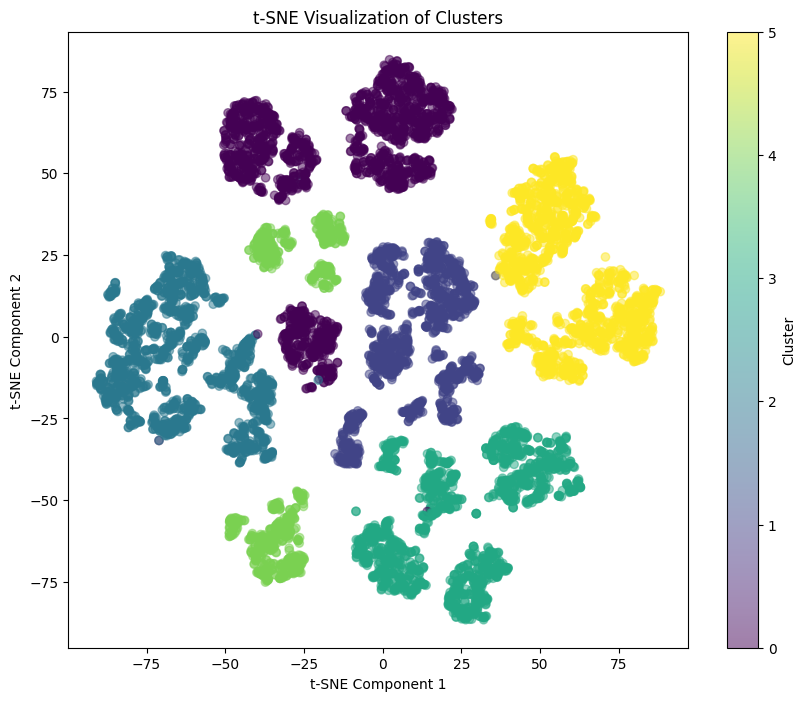

In [173]:
tsne = TSNE(n_components=2, random_state=42)  # Reduce to 2 dimensions
tsne_result = tsne.fit_transform(df)
# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=labels, cmap='viridis', alpha=0.5) # Use kmeans labels for coloring
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Visualization of Clusters')
plt.colorbar(label='Cluster')
plt.show()


In [196]:
# count frequency of each value in column cluster_names

cluster_frequency = df_with_clusters['Cluster_names'].value_counts()
cluster_frequency


,count
Cluster_names,
Cash-Only Withdrawers,1989
Installment Shoppers,1637
Big Spenders,1626
Regular Cash Users,1514
On-Time Payers,1366
New Cash Drawers,818


### ⚠️*Key take away*

The largest segment in the customer base is "Cash-Only Withdrawers" (1,989 customers), indicating a significant number of users rely on their credit cards primarily for cash advances rather than purchases. Meanwhile, "Installment Shoppers" and "Big Spenders" are also substantial groups, showing strong consumer engagement with credit-based purchases. On the other end, "New Cash Drawers" is the smallest segment, suggesting fewer new users are heavily withdrawing cash early in their credit usage journey.

This distribution suggests a need for targeted financial products and marketing strategies—such as rewards for purchases—to shift behavior from cash advances (which can be risky) to more sustainable credit use.

#Plotly

In [175]:
# Configure to open in default browser
import plotly.io as pio
pio.renderers.default = 'colab'

# Compute means on key features
profile = df_with_clusters.groupby('Cluster_names')[[
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
    'ONEOFF_PURCHASES', "INSTALLMENTS_PURCHASES",
    "MINIMUM_PAYMENTS",

]].mean().reset_index()

# Melt for plotting
profile_melt = profile.melt(id_vars='Cluster_names', var_name='Feature', value_name='Mean')

# Bar plot
fig = px.bar(
    profile_melt, x='Feature', y='Mean',
    color='Cluster_names', barmode='group',
    title='Average Key Metric by Cluster'
)

fig.update_layout(xaxis_tickangle=-45, width=900, height=500)

# Show plot in browser
fig.show()

# Optional: Save as HTML file
fig.write_html("cluster_profiles.html")


In [180]:
df_ploting["Cluster_Kmeans"] = df_with_clusters["Cluster_Kmeans"]
df_ploting["Cluster_names"]= df_with_clusters["Cluster_names"]

In [181]:
df_ploting.head()

,UMAP1,UMAP2,Cluster_Kmeans,Cluster_names
0,1.734895,11.749556,3,Installment Shoppers
1,15.998672,10.020932,2,Cash-Only Withdrawers
2,-3.158858,-0.067246,1,On-Time Payers
3,12.040950,1.481431,0,Regular Cash Users
4,-3.905026,1.557084,1,On-Time Payers


In [184]:
df_ploting.to_csv('your_kmeans_umap.csv', index=False)


In [ ]:
# Step 2: Load your data
df = pd.read_csv("your_kmeans_umap.csv")

# Step 3: Compute per-cluster means
profile = df_with_clusters.groupby('Cluster_names')[
    ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
     'MINIMUM_PAYMENTS']
].mean().reset_index()

# Step 4: Melt to long form
profile_melt = profile.melt(
    id_vars='Cluster_names',
    var_name='Feature',
    value_name='Mean'
)

# Step 5: Create bar chart
fig = px.bar(
    profile_melt,
    x='Feature',
    y='Mean',
    color='Cluster_names',
    barmode='group',
    title='Average Key Metrics by Cluster'
)

fig.update_layout(
    xaxis_tickangle=-45,
    width=900,
    height=500,
    legend_title_text='Cluster'
)

# Step 6: Publish to Plotly Chart Studio
upload_url = py.plot(fig, filename="cluster_profile_barplot", auto_open=True)
print(f"📊 Chart published: {upload_url}")


In [ ]:
# Compute per-cluster means
profile = df_with_clusters.groupby('Cluster_names')[
    ['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
     'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
     'MINIMUM_PAYMENTS']
].mean().reset_index()

# Number of clusters
num_clusters = profile.shape[0]

# Create subplot layout: 2 pies per row (adjust as needed)
cols = 2
rows = (num_clusters + 1) // cols

fig = make_subplots(rows=rows, cols=cols, specs=[[{'type': 'domain'}]*cols]*rows,
                    subplot_titles=[f"Cluster {row['Cluster_names']}" for _, row in profile.iterrows()])

# Add a pie chart for each cluster
for i, row in profile.iterrows():
    cluster_name = row['Cluster_names']
    cluster_data = row.drop('Cluster_names')

    r = i // cols + 1
    c = i % cols + 1

    fig.add_trace(
        go.Pie(
            labels=cluster_data.index,
            values=cluster_data.values,
            name=f"Cluster {cluster_name}",
            textinfo='percent+label'
        ),
        row=r,
        col=c
    )

# Layout and title
fig.update_layout(
    title_text="Cluster-wise Distribution of Feature Means",
    height=400 * rows,
    width=800,
    showlegend=False
)

# Upload to Chart Studio (optional)
upload_url = py.plot(fig, filename="cluster_pie_grid", auto_open=True)
print(f"📊 Combined interactive pie chart: {upload_url}")


In [ ]:
# Plot 2D clusters using UMAP coordinates
fig = px.scatter(
    df,
    x='UMAP1',
    y='UMAP2',
    color='Cluster_names',
    title='K-Means Clusters in UMAP Space',
    hover_data=df.columns,  # Show extra info on hover
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(
    width=800,
    height=600,
    legend_title_text='Cluster',
    xaxis_title='UMAP Dimension 1',
    yaxis_title='UMAP Dimension 2'
)

# Optional: Upload to Chart Studio
upload_url = py.plot(fig, filename="kmeans_umap_clusters", auto_open=True)
print(f"📊 Cluster scatter plot: {upload_url}")
